<a href="https://www.kaggle.com/code/pttljessy/eda-learning-equality-curriculum-recommendations?scriptVersionId=148384232" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents
Step 1: Importing necessary libraries and packages

Step 2: Understanding data

Step 3: Cleaning data (Check, visualise, and handle missing/null values)

Step 4: Derive insights and Conclusion


# Step 1: Importing necessary libraries and packages

In [1]:
#Importing necessary libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# returns current date and time
now = datetime.now()

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/learning-equality-curriculum-recommendations/sample_submission.csv
/kaggle/input/learning-equality-curriculum-recommendations/topics.csv
/kaggle/input/learning-equality-curriculum-recommendations/correlations.csv
/kaggle/input/learning-equality-curriculum-recommendations/content.csv


In [3]:
# Loading the .csv files using Pandas
df_content = pd.read_csv('../input/learning-equality-curriculum-recommendations/content.csv')
df_correlations = pd.read_csv('../input/learning-equality-curriculum-recommendations/correlations.csv')
df_topics = pd.read_csv('../input/learning-equality-curriculum-recommendations/topics.csv')

# Step 2: Understanding and Cleaning data


2.1 General information (data type, count of total values, number of unique values)

In [4]:
df_topics.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


In [5]:
df_topics.describe()

,level
count,76972.000000
mean,3.963026
std,1.099633
min,0.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,10.000000


In [6]:
df_topics.shape

(76972, 9)

In [7]:
df_topics.columns

Index(['id', 'title', 'description', 'channel', 'category', 'level',
       'language', 'parent', 'has_content'],
      dtype='object')

In [8]:
print(f'id: {df_topics.id.count()}')
print(f'title: {df_topics.title.count()}')
print(f'description: {df_topics.description.count()}')
print(f'channel: {df_topics.channel.count()}')
print(f'category: {df_topics.category.count()}')
print(f'level: {df_topics.level.count()}')
print(f'language: {df_topics.language.count()}')
print(f'parent: {df_topics.parent.count()}')
print(f'has_content: {df_topics.has_content.count()}')

id: 76972
title: 76970
description: 34953
channel: 76972
category: 76972
level: 76972
language: 76972
parent: 76801
has_content: 76972


In [9]:
print(f'id: {df_topics.id.nunique()}')
print(f'title: {df_topics.title.nunique()}')
print(f'description: {df_topics.description.nunique()}')
print(f'channel: {df_topics.channel.nunique()}')
print(f'category: {df_topics.category.nunique()}')
print(f'level: {df_topics.level.nunique()}')
print(f'language: {df_topics.language.nunique()}')
print(f'parent: {df_topics.parent.nunique()}')
print(f'has_content: {df_topics.has_content.nunique()}')

id: 76972
title: 45082
description: 23067
channel: 171
category: 3
level: 11
language: 28
parent: 17512
has_content: 2


In [10]:
print(f'id: {df_topics.id.dtype}')
print(f'title: {df_topics.title.dtype}')
print(f'description: {df_topics.description.dtype}')
print(f'channel: {df_topics.channel.dtype}')
print(f'category: {df_topics.category.dtype}')
print(f'level: {df_topics.level.dtype}')
print(f'language: {df_topics.language.dtype}')
print(f'parent: {df_topics.parent.dtype}')
print(f'has_content: {df_topics.has_content.dtype}')

id: object
title: object
description: object
channel: object
category: object
level: int64
language: object
parent: object
has_content: bool


In [11]:
print(f'id: {pd.api.types.is_numeric_dtype(df_topics.id)}')
print(f'title: {pd.api.types.is_numeric_dtype(df_topics.title)}')
print(f'description: {pd.api.types.is_numeric_dtype(df_topics.description)}')
print(f'channel: {pd.api.types.is_numeric_dtype(df_topics.channel)}')
print(f'category: {pd.api.types.is_numeric_dtype(df_topics.category)}')
print(f'level: {pd.api.types.is_numeric_dtype(df_topics.level)}')
print(f'language: {pd.api.types.is_numeric_dtype(df_topics.language)}')
print(f'parent: {pd.api.types.is_numeric_dtype(df_topics.parent)}')
print(f'has_content: {pd.api.types.is_numeric_dtype(df_topics.has_content)}')


id: False
title: False
description: False
channel: False
category: False
level: True
language: False
parent: False
has_content: True


Only column level and has_content are numeric type

2.2 Range and middle: (min, max, mean, median, mode, quartiles)

In [12]:
print(df_topics.level.count())
print(df_topics.level.min())
print(df_topics.level.max())
print(df_topics.level.quantile(.25))
print(df_topics.level.quantile(.50))
print(df_topics.level.quantile(.75))
print(df_topics.level.mean())
print(df_topics.level.median())
print(df_topics.level.mode().values[0])


76972
0
10
3.0
4.0
4.0
3.963025515771969
4.0
4


Level column is the depth of this topic within its topic tree. Level 0 means it is a root node (and hence its title is the title of the channel).

- Level values range from level 0 means it is a root node (its title is the title of the channel) to level 10.
- 25% tile is at level 3
- 50% tile is at level 4
- 75% tile is at level 4
- Most of values are at level 4 
- The average value (mean) is 3.963 < 4.0 (median) which says the distribution is slightly left-skewed

2.3 Normality and spread: (standard deviation, skewness, kurtosis)

In [13]:
df_topics.level.std()

1.0996329801283913

In [14]:
np.std(df_topics.level, ddof=1)

1.0996329801283913

In [15]:
from scipy.stats import skew, kurtosis

print(skew(df_topics.level, bias=False))
print(kurtosis(df_topics.level, bias=False))

0.12129619138342566
1.0882635958446034


In [16]:
print(df_topics.level.skew())
print(df_topics.level.kurt())

0.12129619138342566
1.0882635958446039


1. df_topics dataframe

In [17]:
#Run basic summary stats
df_topics.describe(include='all')

,id,title,description,channel,category,level,language,parent,has_content
count,76972,76970,34953,76972,76972,76972.000000,76972,76801,76972
unique,76972,45082,23067,171,3,NaN,28,17512,2
top,t_00004da3a1b2,Assessments,v0.1,fef095,source,NaN,en,t_344131c2889b,True
freq,1,558,371,5770,43487,NaN,36161,270,61517
mean,NaN,NaN,NaN,NaN,NaN,3.963026,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.099633,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [18]:
#count unique 'id' values, grouped by has_content
df_topics.groupby('has_content')['id'].nunique()

has_content
False    15455
True     61517
Name: id, dtype: int64

has_content = True means there are content items correlated with this topic. 
Observation: We have 28228 content items correlated with this topic which take up 80.76% of all content items. 19.24% of them are not correlated (where has_content = False)

Observation

# Step 3: Cleaning data (Check, visualise, and handle missing/null values)

Check, visualise, and handle missing/null values

In [19]:
# Get Information about Missing Values
df_topics.isnull().sum()

id                 0
title              2
description    42019
channel            0
category           0
level              0
language           0
parent           171
has_content        0
dtype: int64

<AxesSubplot:>

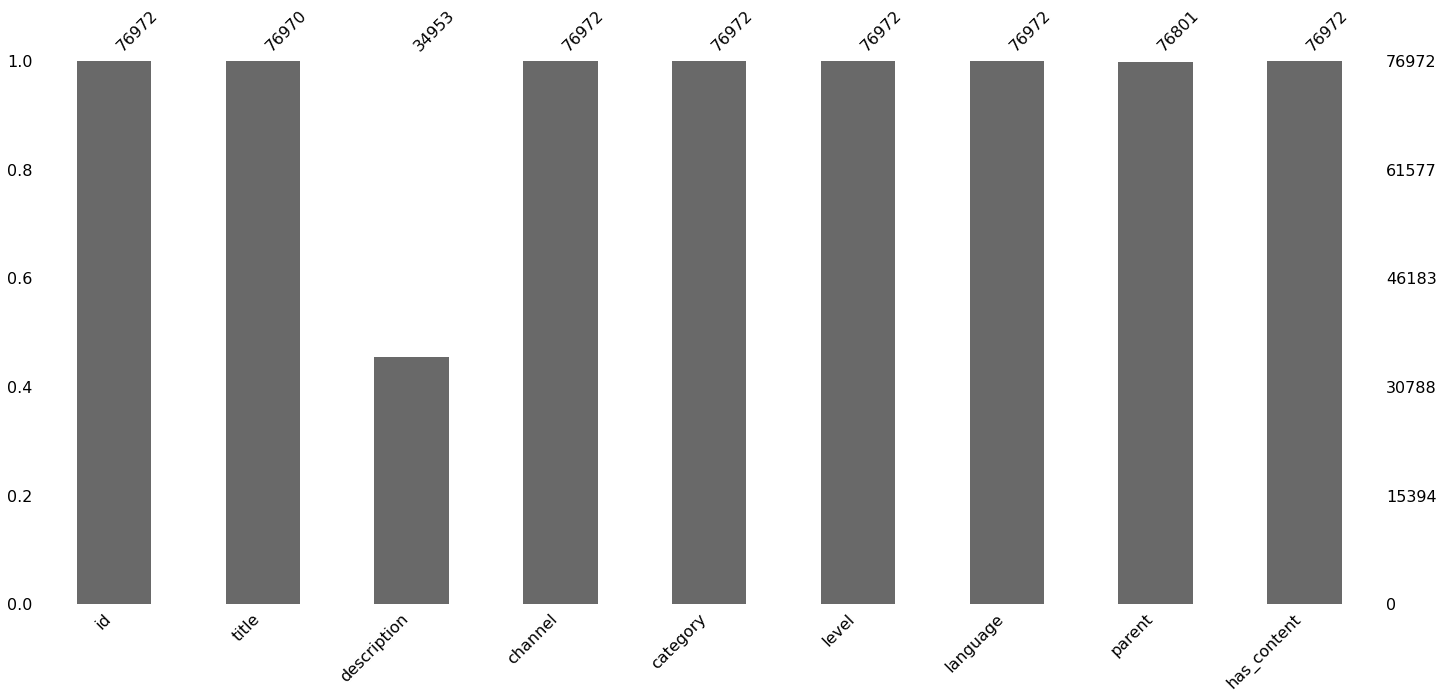

In [20]:
# visualise missing values
msno.bar(df_topics)

Observation: Description is the most missing values columns, followed by parent column

In [21]:
# Removing Null Entries
no_missing = df_topics.dropna(axis=0,inplace=True) # drop missing values and assign the data to no_missing

In [22]:
#check df_topics after removing null entries
df_topics.isnull().sum()

id             0
title          0
description    0
channel        0
category       0
level          0
language       0
parent         0
has_content    0
dtype: int64

2. df_content dataframe

In [23]:
#Run basic summary stats
df_content.describe(include='all')

,id,title,description,kind,text,language,copyright_holder,license
count,154047,154038,89456,154047,74035,154047,71821,74035
unique,154047,130937,76305,5,70687,27,148,7
top,c_00002381196d,Video,v0.1,video,Unsupported browser\n\nThe HTML5 content is no...,en,Khan Academy,CC BY-NC-SA
freq,1,504,903,61487,234,65939,17034,52088


In [24]:
# Get Information about Missing Values
df_content.isnull().sum()

id                      0
title                   9
description         64591
kind                    0
text                80012
language                0
copyright_holder    82226
license             80012
dtype: int64

<AxesSubplot:>

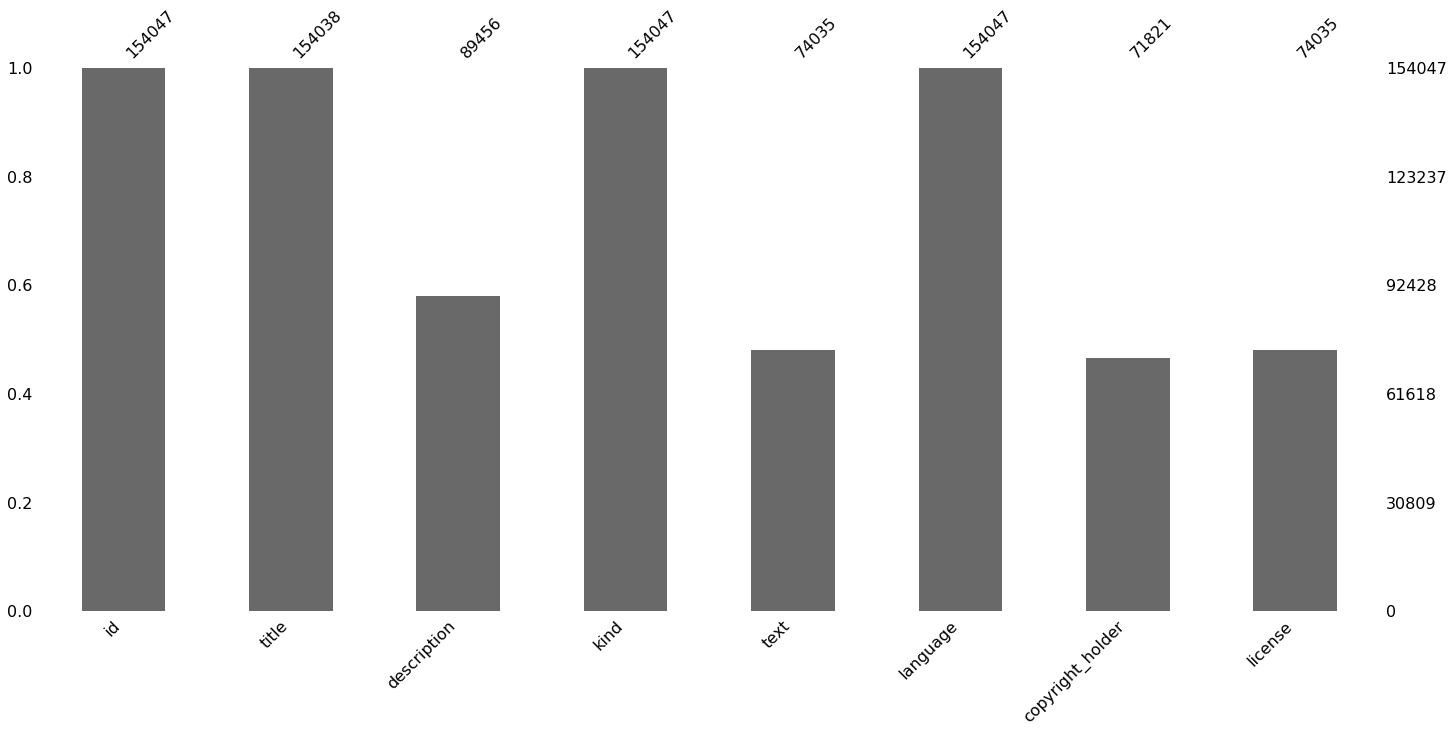

In [25]:
# visualise missing values
msno.bar(df_content)

Observation: Description, Text, copyright_holdet and license is the most missing values columns

In [26]:
# Removing Null Entries
no_missing = df_content.dropna(axis=0,inplace=True) # drop missing values and assign the data to no_missing

In [27]:
df_content.isnull().sum()

id                  0
title               0
description         0
kind                0
text                0
language            0
copyright_holder    0
license             0
dtype: int64

In [28]:
df_content.describe(include='all')

,id,title,description,kind,text,language,copyright_holder,license
count,41621,41621,41621,41621,41621,41621,41621,41621
unique,41621,35881,38654,4,39817,24,106,7
top,c_0000c03adc8d,Lección 2,Visit us (http://www.khanacademy.org/science/h...,document,Unsupported browser\n\nThe HTML5 content is no...,en,Khan Academy,CC BY-NC-SA
freq,1,185,319,20653,230,16906,15796,28314


Conclusion

In [29]:
df_content.head()

,id,title,description,kind,text,language,copyright_holder,license
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA
12,c_0005765779c8,Ендомембранна система,"Преглед на мембранните структури, които образу...",video,В това видео ще разгледаме ендомембранната сис...,bg,Khan Academy,CC BY-NC-SA
14,c_00068709797c,Kuhesabu vizio mraba kutafuta kanuni ya eneo,Sal anatumia kizio mraba kuona kwa nini kuzidi...,video,"Nina mistatili mitatu hapa, na pia nina vipimo...",sw,Khan Academy,CC BY-NC-SA
17,c_0006f51dc8e7,Lección 13,Objetivo: multiplicar factores numéricos mixto...,document,Lesson 13 5\n\nNYS COMMON CORE MATHEMATICS CUR...,es,Engage NY,CC BY-NC-SA


In [30]:
print(f'id: {df_topics.id.count()}')

id: 34952


In [31]:
#count unique 'id' values, grouped by kind
df_content.groupby('kind')['id'].nunique()


kind
document    20653
exercise     1466
html5        2963
video       16539
Name: id, dtype: int64

In [32]:
#count unique 'id' values, grouped by language
df_content.groupby('language')['id'].nunique()

language
ar      1392
as        17
bg      2725
bn        21
en     16906
es     11405
fr      2024
gu       974
hi       228
it       247
kn        14
mr       120
my        10
or        15
pl       184
pnb       14
pt      3670
ru        66
sw       432
ta        14
te        12
tr        57
ur         4
zh      1070
Name: id, dtype: int64

In [33]:
#count unique 'id' values, grouped by copyright_holder
df_content.groupby('copyright_holder')['id'].nunique().sort_values(ascending=False)

copyright_holder
Khan Academy                                                                                               15796
Engage NY                                                                                                   9819
Sikana Education                                                                                            6198
Stack Overflow                                                                                              3573
Edraak                                                                                                       875
                                                                                                           ...  
Nal’Ibali and Praesa 2013                                                                                      1
Nicola Rijsdijk, Maya Marshak, Tarryn-Anne Anderson, Bookdash.org and African Storybook Initiative 2015        1
Camara Education Ethiopia                                                      

# Conclusion


- Most content items are correlated with leaf tocpis (80.76%)
- Most common format of content is in document (49.62%), followed by video (39.74%), html5 (7.12%) and exercise (3.52%) which is the least common
- Most common language is in English (language = en) which take up 40.62%, followed by es (27.40%). Most rare language is ur (0.01%)
- Khan Academy is the one holding most copyright items (15796) , followed by Engage NY (9819)